Solving ODE: dy/dx = x + y
Step 1: x = 0.2, y = 0.020000000000000004
Step 2: x = 0.4, y = 0.0884
Step 3: x = 0.6000000000000001, y = 0.215848
Step 4: x = 0.8, y = 0.41533456
Step 5: x = 1.0, y = 0.7027081632000001
Step 6: x = 1.2, y = 1.0973039591040001
Step 7: x = 1.4, y = 1.6227108301068802
Step 8: x = 1.5999999999999999, y = 2.307707212730394
Step 9: x = 1.7999999999999998, y = 3.1874027995310805
Step 10: x = 1.9999999999999998, y = 4.304631415427918


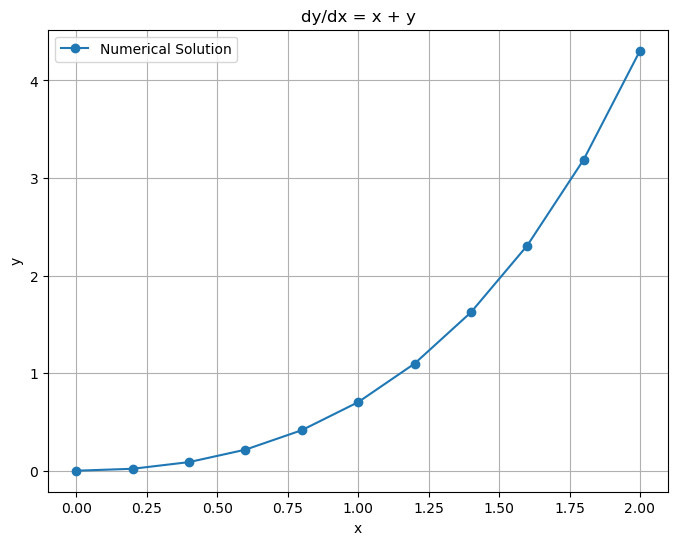

Solving ODE: dy/dx = y
Step 1: x = 0.1, y = 1.105
Step 2: x = 0.2, y = 1.221025


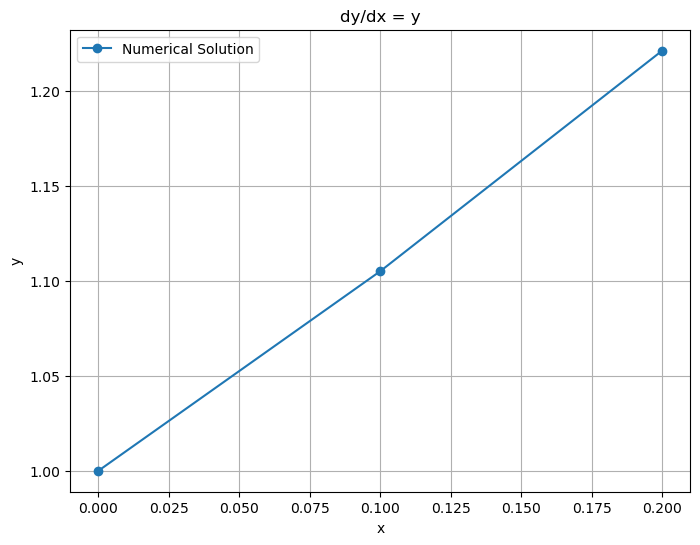

Solving ODE: dy/dx = 1 + y^2
Step 1: x = 0.1, y = 0.10049999999999999
Step 2: x = 0.2, y = 0.20303532700877502


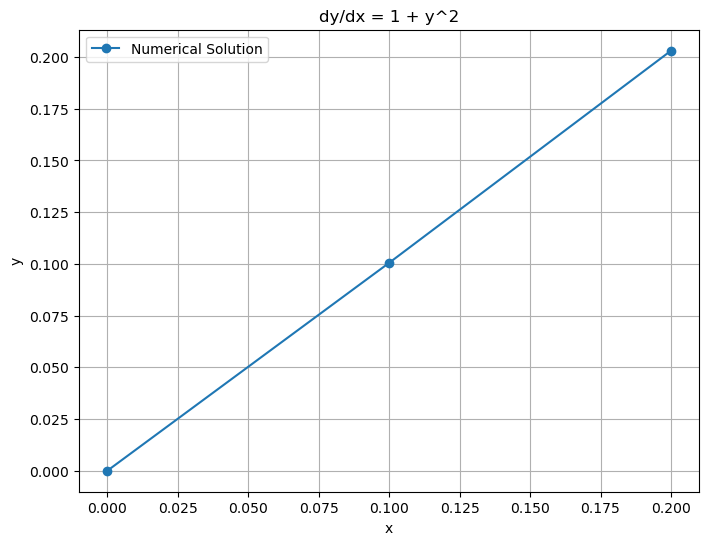

Solving ODE: dy/dx = 2xy
Step 1: x = 0.1, y = 1.01
Step 2: x = 0.2, y = 1.040704


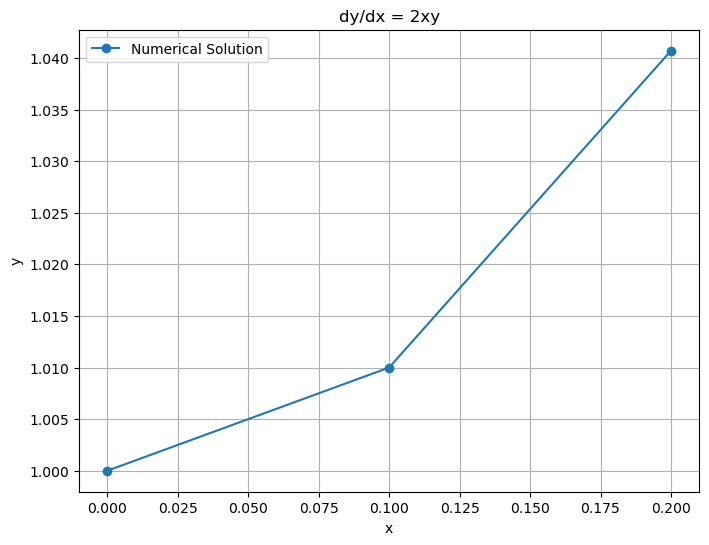

Solving ODE: dy/dx = 3x^2*(1+y)
Step 1: x = 0.05, y = 0.00018750000000000006
Step 2: x = 0.1, y = 0.0011254570839843753


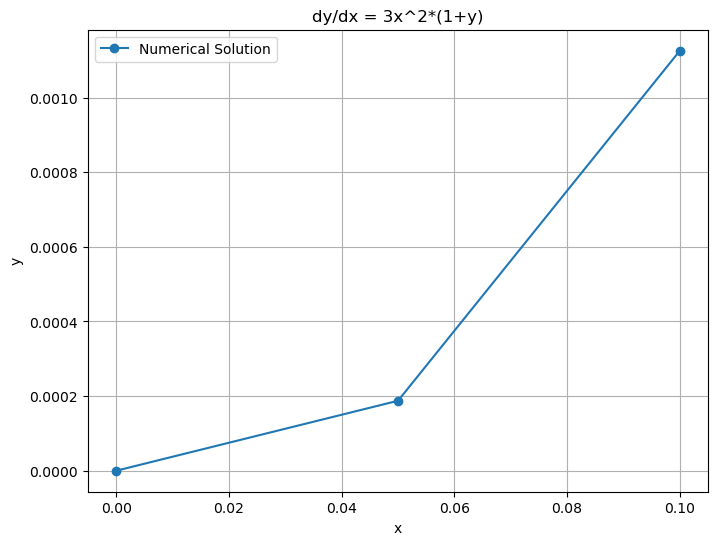

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def adams_moulton_solver(f, x0, y0, x_end, h):
    """
    Solve an ODE using the Adams-Moulton method.
    Parameters:
    f: Function representing dy/dx = f(x, y)
    x0: Initial x value
    y0: Initial y value
    x_end: End x value
    h: Step size
    Returns:
    x_vals, y_vals: Arrays of x and y values.
    """
    x_vals = [x0]
    y_vals = [y0]
    n_steps = int((x_end - x0) / h)

    for i in range(n_steps):
        x_prev, y_prev = x_vals[-1], y_vals[-1]
        x_next = x_prev + h
        y_pred = y_prev + h * f(x_prev, y_prev)
        y_next = y_prev + (h / 2) * (f(x_prev, y_prev) + f(x_next, y_pred))
        x_vals.append(x_next)
        y_vals.append(y_next)
        print(f"Step {i + 1}: x = {x_next}, y = {y_next}")
    return np.array(x_vals), np.array(y_vals)
def plot_solution(x_vals, y_vals, title):
    """Plot the solution of the ODE."""
    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y_vals, 'o-', label='Numerical Solution')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    plt.show()
odes = [
    (lambda x, y: x + y, 0, 0, 2, 0.2, "dy/dx = x + y"),
    (lambda x, y: y, 0, 1, 0.3, 0.1, "dy/dx = y"),
    (lambda x, y: 1 + y**2, 0, 0, 0.3, 0.1, "dy/dx = 1 + y^2"),
    (lambda x, y: 2 * x * y, 0, 1, 0.2, 0.1, "dy/dx = 2xy"),
    (lambda x, y: 3 * x**2 * (1 + y), 0, 0, 0.1, 0.05, "dy/dx = 3x^2*(1+y)")
]
for f, x0, y0, x_end, h, title in odes:
    print(f"Solving ODE: {title}")
    x_vals, y_vals = adams_moulton_solver(f, x0, y0, x_end, h)
    plot_solution(x_vals, y_vals, title)
